 t > | Emec >
0.0 21.990740740740737
 t > | Emec >
0.001 21.990743477880734
 t > | Emec >
0.002 21.99074621502074
 t > | Emec >
0.003 21.990748952160743
 t > | Emec >
0.004 21.990751689300733
 t > | Emec >
0.005 21.990754426440738
 t > | Emec >
0.006 21.99075716358074
 t > | Emec >
0.007 21.99075990072074
 t > | Emec >
0.008 21.99076263786074
 t > | Emec >
0.009000000000000001 21.990765375000738
 t > | Emec >
0.01 21.990768112140735
 t > | Emec >
0.011 21.99077084928074
 t > | Emec >
0.012 21.990773586420737
 t > | Emec >
0.013000000000000001 21.990776323560738
 t > | Emec >
0.014 21.990779060700735
 t > | Emec >
0.015 21.99078179784074
 t > | Emec >
0.016 21.990784534980737
 t > | Emec >
0.017 21.99078727212074
 t > | Emec >
0.018000000000000002 21.99079000926074
 t > | Emec >
0.019 21.990792746400732
 t > | Emec >
0.02 21.990795483540733
 t > | Emec >
0.021 21.990798220680734
 t > | Emec >
0.022 21.990800957820735
 t > | Emec >
0.023 21.99080369496074
 t > | Emec >
0.024 21.990806432

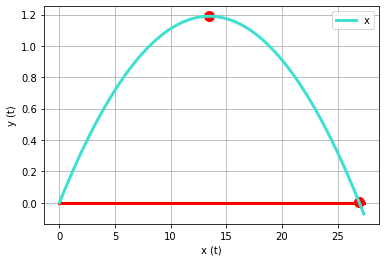

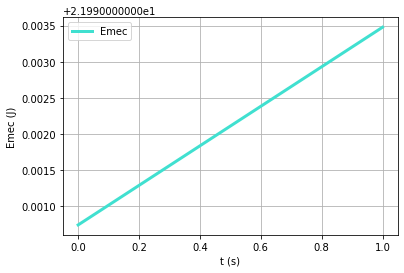

In [10]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gravidade
g = 9.8

# Massa
m = 0.057

# Tempo inicial e final
ti = 0
tf = 1

# Angulo inicial
alpha = 10

# Posição inicial
xx0 = 0
xy0 = 0


# Velocidade inicial
v0 = 100 * 1000 / 3600

vx0 = v0 * np.cos(np.deg2rad(alpha))
vy0 = v0 * np.sin(np.deg2rad(alpha))



# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)

# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)

xy = np.empty(n + 1)
vy = np.empty(n + 1)
ay = np.empty(n + 1)

Emec = np.empty(n + 1)

# Introduzir x0 e v0 nos vetores da posição e velocidade
xx[0] = xx0
vx[0] = vx0

xy[0] = xy0
vy[0] = vy0



# Preencher os vetores x, v, a
for i in range(n):
    vTotal = np.sqrt(vx[i] ** 2 + vy[i] ** 2)
            
    ax[i] = 0
    xx[i + 1] = xx[i] + vx[i] * dt
    vx[i + 1] = vx[i] + ax[i] * dt
    
    ay[i] = -g
    xy[i + 1] = xy[i] + vy[i] * dt
    vy[i + 1] = vy[i] + ay[i] * dt
    
    
    #Emec:
    print(" t > | Emec >")
    Emec[i] = 0.5 * m * vTotal**2 + m * g * xy[i]
    print(t[i], Emec[i])
    
vTotal = np.sqrt(vx[-1] ** 2 + vy[-1] ** 2)
Emec[-1] = 0.5 * m * vTotal**2 + m * g * xy[-1]
        
# Encontrar os dados do paraquedista quando ele chega ao solo (x = 0)
for i in range(n):
    if (vy[i] > (0 - dt) and vy[i + 1] < (0 + dt)):
        print("Vy = 0:")
        print("t >               |     xx >        |     yy >         |   vy >")
        print(t[i], xx[i], xy[i], vy[i])
        print("")
        plt.plot(xx[i], xy[i], "o", markersize="10", linewidth=5, color="red")
        break

# Encontrar os dados do paraquedista quando ele chega ao solo (x = 0)
for i in range(n):
    if (xy[i] > (0 - dt) and xy[i + 1] < (0 + dt)):
        print("Xy = 0:")
        print("t > |    xx >          |     yy >           |   vy >")
        print(t[i], xx[i], xy[i], vy[i])
        print("")
        plt.plot(xx[i], xy[i], "o", markersize="10", linewidth=5, color="red")
        break



# Plot
plt.plot(xx, 0 * xy, linestyle='-', linewidth=3, color="red")
plt.plot(xx, xy, label="x",  linestyle='-', linewidth=3, color="turquoise")
plt.xlabel("x (t)")
plt.ylabel("y (t)")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.show()    


# Plot
plt.plot(t, Emec, label="Emec",  linestyle='-', linewidth=3, color="turquoise")
plt.xlabel("t (s)")
plt.ylabel("Emec (J)")
plt.legend()         # Legenda só aparece com isto
plt.grid()